In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
!pip install fiona

In [31]:
#capas del mapa total
import geopandas as gpd
shapefile_path = "/content/drive/MyDrive/SHAPEFILE/MAPA6362.gpkg"
from  fiona import listlayers
listlayers(shapefile_path)

['México',
 'Estados de México',
 'Municipios de México',
 'Ríos de México',
 'Estados_de_México',
 'Municipalidades_de_México',
 'aeropuerto',
 'Aereopuertos de Mexico',
 'aaeropuertointento']

In [32]:
#abriendo todas las capas
Mexico=gpd.read_file(shapefile_path,layer='México')
Estados=gpd.read_file(shapefile_path,layer='Estados de México')
Municipios=gpd.read_file(shapefile_path,layer='Municipios de México')
Rios=gpd.read_file(shapefile_path,layer='Ríos de México')
Aeropuertos=gpd.read_file(shapefile_path,layer='Aereopuertos de Mexico')

In [33]:
#EXERCISE 1

In [34]:
#obtener la latitud del centroide de mexico
centroid = Mexico.geometry.centroid.iloc[0]


In [35]:
#b)Plot your country as the background. Select with cx all the first administrative divisions above the centroid. Then, use clip to show some lines (rivers, railroads, etc) that cross those divisions.

In [36]:
#empezar con el cx para el 2do mapa seleccionando los estados arriba del centroide
states_above = Estados.cx[:, centroid.y:]
#recortar los rios que cruzan los estados
rivers_above = gpd.clip(Rios, mask=states_above)

<Axes: >

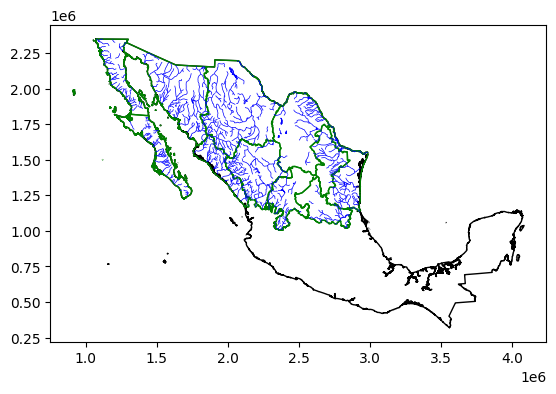

In [37]:
#mapear
base = Mexico.plot(facecolor='white', edgecolor='black')
states_above.plot(ax=base, edgecolor='green', facecolor='none')
rivers_above.plot(ax=base, color='blue', linewidth=0.5)

In [38]:
#EXERCISE 2
#a)Create some subset of polygons with your country data at the municipal (or similar level). Use Unary UNION with those polygons, and create a geoDF with the result.

In [39]:
Municipios.head()
#la columna que indica el nivel administrativo superior es NOM_ENT

CVEGEO CVE_ENT CVE_MUN                NOMGEO         NOM_ENT  COV_  COV_ID  \
0  01008      01     008   San JosÃ© de Gracia  Aguascalientes     0       1   
1  01009      01     009             TepezalÃ¡  Aguascalientes     1       2   
2  01007      01     007      RincÃ³n de Romos  Aguascalientes     2       3   
3  01006      01     006  PabellÃ³n de Arteaga  Aguascalientes     3       4   
4  01005      01     005         JesÃºs MarÃ­a  Aguascalientes     4       5   

         AREA   PERIMETER                                           geometry  
0  857.790574  181.537599  MULTIPOLYGON (((2453326.553 1143576.423, 24533...  
1  229.661012   89.329532  MULTIPOLYGON (((2481826.447 1149055.253, 24815...  
2  372.295163  161.749880  MULTIPOLYGON (((2476760.231 1150329.045, 24767...  
3  195.735946  105.612997  MULTIPOLYGON (((2473996.656 1129304.114, 24742...  
4  499.895092  163.500811  MULTIPOLYGON (((2463657.764 1116053.82, 246373...

In [40]:
!pip show shapely

Name: shapely
Version: 2.1.1
Summary: Manipulation and analysis of geometric objects
Home-page: 
Author: Sean Gillies
Author-email: 
License: BSD 3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy
Required-by: bigframes, geopandas, google-cloud-aiplatform, libpysal


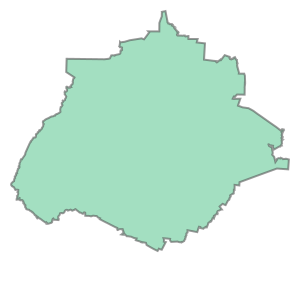

In [41]:
#se usa unary union
Municipios[Municipios.NOM_ENT	=='Aguascalientes'].union_all()

In [42]:
#se guarda el resultado como GDF
Aguascalientes_union=Municipios[Municipios.NOM_ENT	=='Aguascalientes'].union_all()
gpd.GeoDataFrame(index=[0],data={'NOM_ENT':'Aguascalientes'},
                 crs=Municipios.crs,
                 geometry=[Aguascalientes_union])

NOM_ENT                                           geometry
0  Aguascalientes  POLYGON ((2493225.932 1086383.198, 2493215.678...

In [43]:
#b)Dissolve your municipalities by another higher level administrative level. Plot the result.

<Axes: >

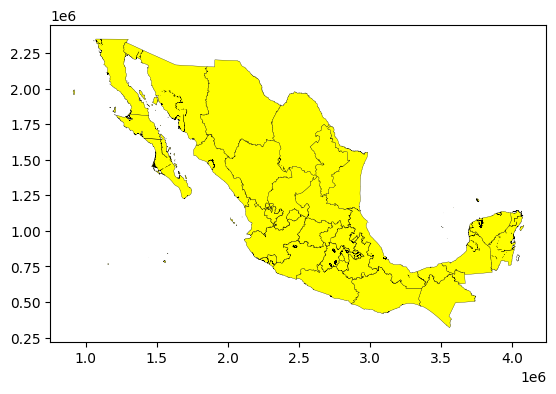

In [44]:
# dissolviendo
Municipios.dissolve(by='NOM_ENT').plot(facecolor='yellow', edgecolor='black',linewidth=0.2)

In [45]:
#se guarda
Municipios_noment_diss=Municipios.dissolve(by='NOM_ENT')
#contenido
Municipios_noment_diss

geometry  \
NOM_ENT                                                                              
Aguascalientes                   POLYGON ((2493225.932 1086383.198, 2493215.678...   
Baja California                  MULTIPOLYGON (((1208805.587 1871985.863, 12088...   
Baja California Sur              MULTIPOLYGON (((1480905.701 1486724.44, 148089...   
Campeche                         MULTIPOLYGON (((3740344.724 698093.56, 3740337...   
Chiapas                          POLYGON ((3456364.017 410244.408, 3456354.194 ...   
Chihuahua                        POLYGON ((1911849.33 1596236.636, 1911752.171 ...   
Ciudad de MÃ©xico                POLYGON ((2796187.794 791422.877, 2791683.442 ...   
Coahuila de Zaragoza             POLYGON ((2400502.318 1417734.605, 2400541.129...   
Colima                           MULTIPOLYGON (((1157982.569 768502.087, 115807...   
Durango                          POLYGON ((2278684.096 1232301.627, 2278557.874...   
Guanajuato                       POLYGON ((2607374.6 889630.326, 2607588.693 88...   
Guerrero                         MULTIPOLYGON (((2723862.442 539129.896, 272395...   
Hidalgo                          POLYGON ((2797625.02 894522.629, 2797590.515 8...   
Jalisco                          MULTIPOLYGON (((2204931.909 806289.417, 220493...   
MichoacÃ¡n de Ocampo             POLYGON ((2485232.296 688628.884, 2485173.182 ...   
Morelos                          POLYGON ((2794702.651 721138.485, 2790423.569 ...   
MÃ©xico                          POLYGON ((2703346.159 732889.82, 2703350.864 7...   
Nayarit                          MULTIPOLYGON (((2192487.742 992082.253, 219248...   
Nuevo LeÃ³n                      POLYGON ((2713891.828 1298366.557, 2713140.212...   
Oaxaca                           MULTIPOLYGON (((2938921.528 459623.96, 2938869...   
Puebla                           POLYGON ((2891854.653 662990.603, 2891845.731 ...   
QuerÃ©taro                       POLYGON ((2710622.469 916588.179, 2710657.246 ...   
Quintana Roo                     MULTIPOLYGON (((4008978.137 849701.662, 400896...   
San Luis PotosÃ­                 POLYGON ((2789571.526 1075600.577, 2789302.782...   
Sinaloa                          MULTIPOLYGON (((1984154.824 1477387.68, 198436...   
Sonora                           MULTIPOLYGON (((1611112.809 1791037.225, 16111...   
Tabasco                          POLYGON ((3472897.77 641606.672, 3472835.16 64...   
Tamaulipas                       POLYGON ((2794903.937 1156874.082, 2793466.382...   
Tlaxcala                         POLYGON ((2891967.168 801196.485, 2891850.369 ...   
Veracruz de Ignacio de la Llave  MULTIPOLYGON (((2968432.178 912387.855, 296846...   
YucatÃ¡n                         MULTIPOLYGON (((3743319.9 993236.021, 3743222....   
Zacatecas                        POLYGON ((2391396.299 1028263.3, 2391320 10282...   

                                CVEGEO CVE_ENT CVE_MUN  \
NOM_ENT                                                  
Aguascalientes                   01008      01     008   
Baja California                  02007      02     007   
Baja California Sur              03008      03     008   
Campeche                         04011      04     011   
Chiapas                          07078      07     078   
Chihuahua                        08018      08     018   
Ciudad de MÃ©xico                09017      09     017   
Coahuila de Zaragoza             05010      05     010   
Colima                           06007      06     007   
Durango                          10011      10     011   
Guanajuato                       11037      11     037   
Guerrero                         12080      12     080   
Hidalgo                          13030      13     030   
Jalisco                          14113      14     113   
MichoacÃ¡n de Ocampo             16088      16     088   
Morelos                          17006      17     006   
MÃ©xico                          15044      15     044   
Nayarit                          18014      18 

In [46]:
#c)If possible, color some areas of your country by aggregating; if not, plot the "median" values in the indicators map

In [47]:
Municipios.head()
#se pueden usar area y perimetro

CVEGEO CVE_ENT CVE_MUN                NOMGEO         NOM_ENT  COV_  COV_ID  \
0  01008      01     008   San JosÃ© de Gracia  Aguascalientes     0       1   
1  01009      01     009             TepezalÃ¡  Aguascalientes     1       2   
2  01007      01     007      RincÃ³n de Romos  Aguascalientes     2       3   
3  01006      01     006  PabellÃ³n de Arteaga  Aguascalientes     3       4   
4  01005      01     005         JesÃºs MarÃ­a  Aguascalientes     4       5   

         AREA   PERIMETER                                           geometry  
0  857.790574  181.537599  MULTIPOLYGON (((2453326.553 1143576.423, 24533...  
1  229.661012   89.329532  MULTIPOLYGON (((2481826.447 1149055.253, 24815...  
2  372.295163  161.749880  MULTIPOLYGON (((2476760.231 1150329.045, 24767...  
3  195.735946  105.612997  MULTIPOLYGON (((2473996.656 1129304.114, 24742...  
4  499.895092  163.500811  MULTIPOLYGON (((2463657.764 1116053.82, 246373...

In [48]:
#Agrupamos por estados y sacamos promedios por estado
Municipios.dissolve(
     by="NOM_ENT",
     aggfunc={
         "AREA": ["mean"],
         "PERIMETER": ["mean"]
     },as_index=False,
 )

NOM_ENT  \
0                    Aguascalientes   
1                   Baja California   
2               Baja California Sur   
3                          Campeche   
4                           Chiapas   
5                         Chihuahua   
6                 Ciudad de MÃ©xico   
7              Coahuila de Zaragoza   
8                            Colima   
9                           Durango   
10                       Guanajuato   
11                         Guerrero   
12                          Hidalgo   
13                          Jalisco   
14             MichoacÃ¡n de Ocampo   
15                          Morelos   
16                          MÃ©xico   
17                          Nayarit   
18                      Nuevo LeÃ³n   
19                           Oaxaca   
20                           Puebla   
21                       QuerÃ©taro   
22                     Quintana Roo   
23                 San Luis PotosÃ­   
24                          Sinaloa   
25                           Sonora   
26                          Tabasco   
27                       Tamaulipas   
28                         Tlaxcala   
29  Veracruz de Ignacio de la Llave   
30                         YucatÃ¡n   
31                        Zacatecas   

                                             geometry  (AREA, mean)  \
0   POLYGON ((2493225.932 1086383.198, 2493215.678...    505.333986   
1   MULTIPOLYGON (((1208805.587 1871985.863, 12088...  10486.594087   
2   MULTIPOLYGON (((1480905.701 1486724.44, 148089...  14281.427387   
3   MULTIPOLYGON (((3740344.724 698093.56, 3740337...   4405.371442   
4   POLYGON ((3456364.017 410244.408, 3456354.194 ...    593.688379   
5   POLYGON ((1911849.33 1596236.636, 1911752.171 ...   3686.169552   
6   POLYGON ((2796187.794 791422.877, 2791683.442 ...     92.886451   
7   POLYGON ((2400502.318 1417734.605, 2400541.129...   3965.032184   
8   MULTIPOLYGON (((1157982.569 768502.087, 115807...    575.412270   
9   POLYGON ((2278684.096 1232301.627, 2278557.874...   3131.569355   
10  POLYGON ((2607374.6 889630.326, 2607588.693 88...    659.560326   
11  MULTIPOLYGON (((2723862.442 539129.896, 272395...    747.905201   
12  POLYGON ((2797625.02 894522.629, 2797590.515 8...    245.887449   
13  MULTIPOLYGON (((2204931.909 806289.417, 220493...    623.758184   
14  POLYGON ((2485232.296 688628.884, 2485173.182 ...    515.942077   
15  POLYGON ((2794702.651 721138.485, 2790423.569 ...    134.983718   
16  POLYGON ((2703346.159 732889.82, 2703350.864 7...    177.814827   
17  MULTIPOLYGON (((2192487.742 992082.253, 219248...   1391.250673   
18  POLYGON ((2713891.828 1298366.557, 2713140.212...   1246.252037   
19  MULTIPOLYGON (((2938921.528 459623.96, 2938869...    164.855545   
20  POLYGON ((2891854.653 662990.603, 2891845.731 ...    157.385581   
21  POLYGON ((2710622.469 916588.179, 2710657.246 ...    643.848197   
22  MULTIPOLYGON (((4008978.137 849701.662, 400896...   4052.033646   
23  POLYGON ((2789571.526 1075600.577, 2789302.782...   1043.102723   
24  MULTIPOLYGON (((1984154.824 1477387.68, 198436...   3156.423935   
25  MULTIPOLYGON (((1611112.809 1791037.225, 16111...   2508.803298   
26  POLYGON ((3472897.77 641606.672, 3472835.16 64...   1453.014355   
27  POLYGON ((2794903.937 1156874.082, 2793466.382...   1847.608641   
28  POLYGON ((2891967.168 801196.485, 2891850.369 ...     66.223123   
29  MULTIPOLYGON (((2968432.178 912387.855, 296846...    337.110483   
30  MULTIPOLYGON (((3743319.9 993236.021, 3743222....    371.921207   
31  POLYGON ((2391396.299 1028263.3, 2391320 10282...   1284.132885   

    (PERIMETER, mean)  
0          149.454789  
1          730.506970  
2         1246.065773  
3          419.980148  
4          150.253267  
5          372.568755  
6           49.617679  
7          355.540991  
8          176.791888  
9          373.309815  
10         165.629101  
11         179.397082  
12         106.656933  
13         167.414702  
14         132.670352  
15          

<Axes: >

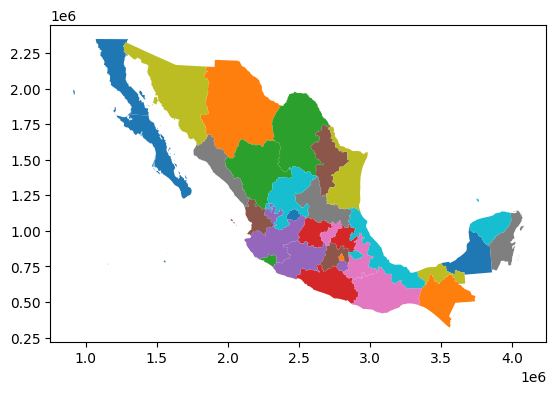

In [49]:
#mapear
area_perimetro_PorEstado=Municipios.dissolve(
     by="NOM_ENT",
     aggfunc={
         "AREA": ["mean"],
         "PERIMETER": ["mean"]
     },as_index=False,
 )
area_perimetro_PorEstado.plot(column='NOM_ENT')

In [50]:
!pip install mapclassify

<Axes: >

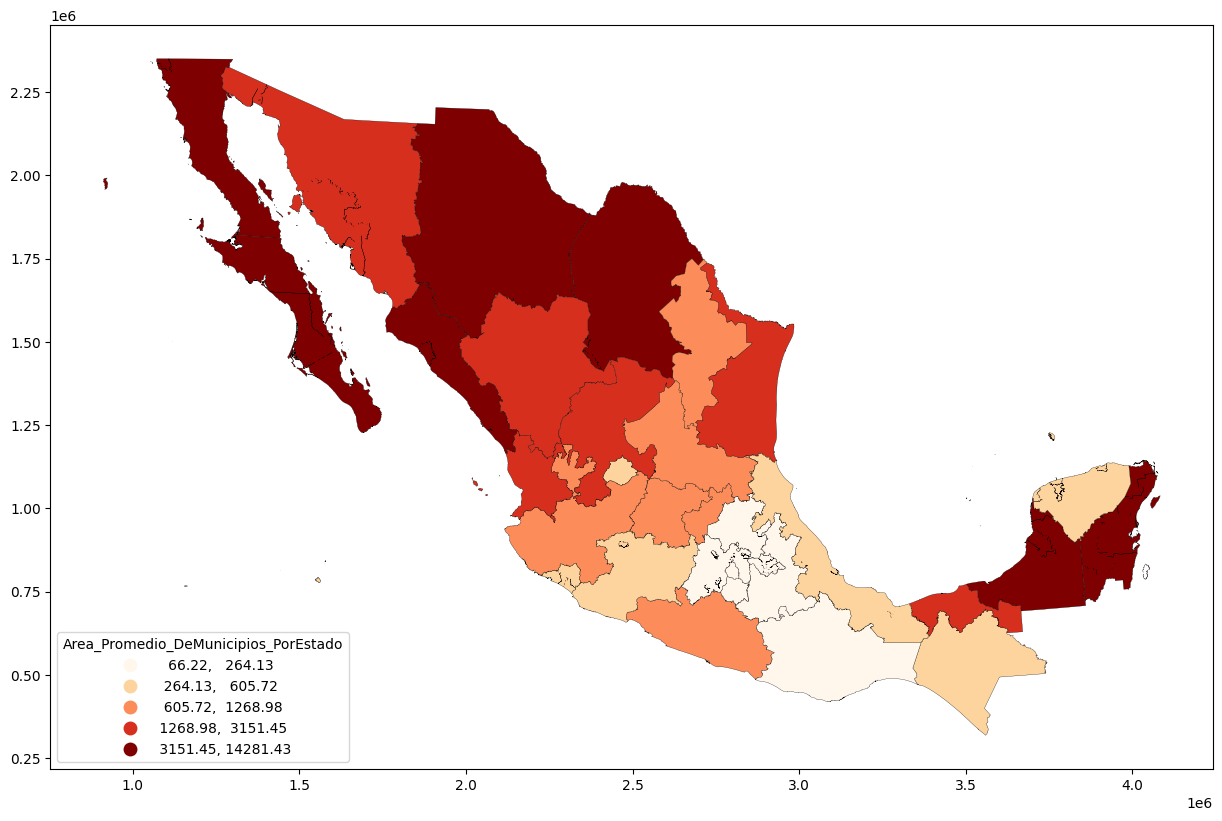

In [51]:
#haciendo un cloropleth de area
area_perimetro_PorEstado.plot(column =('AREA', 'mean'),scheme='quantiles', cmap='OrRd',
                        legend=True,
                        legend_kwds={"title": "Area_Promedio_DeMunicipios_PorEstado",'loc': 'lower left'},
                        edgecolor='black',linewidth=0.2,
                        figsize=(15, 10))

<Axes: >

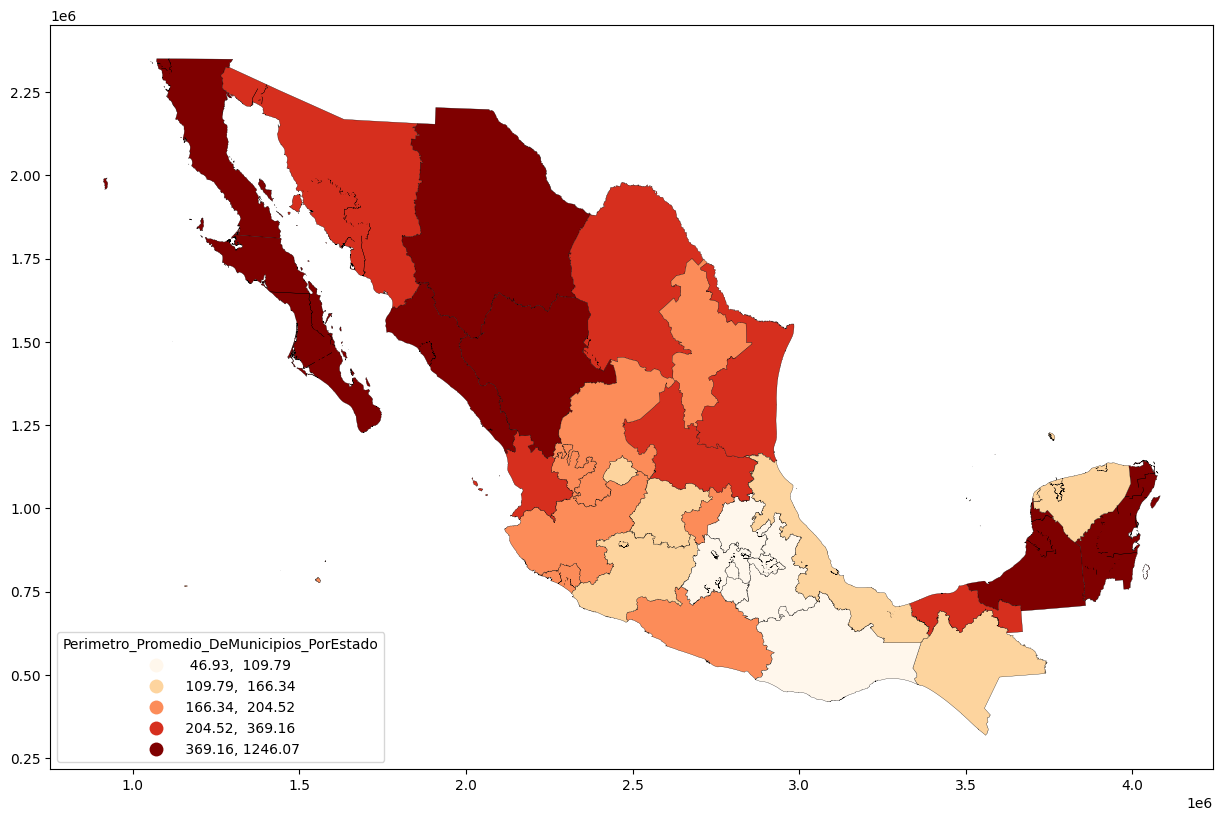

In [52]:
#haciendo un cloropleth de perimetros
area_perimetro_PorEstado.plot(column =('PERIMETER', 'mean'),scheme='quantiles', cmap='OrRd',
                        legend=True,
                        legend_kwds={"title": "Perimetro_Promedio_DeMunicipios_PorEstado",'loc': 'lower left'},
                        edgecolor='black',linewidth=0.2,
                        figsize=(15, 10))

In [53]:
#EXERCISE 3

In [54]:
#EXERCISE 4

In [55]:
#ya teníamos el centroide por lo que se procede a usarlo para obtener las municipalidades del norte, sur, este y oeste

In [57]:
mun_norte=Municipios.cx[:,centroid.y:]
mun_sur=Municipios.cx[:,:centroid.y]
mun_oeste=Municipios.cx[:centroid.x,:]
mun_este=Municipios.cx[centroid.x:,:]

<Axes: >

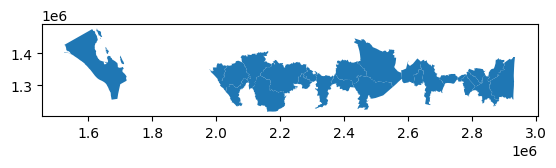

In [59]:
#el primer spatial overlay que se eligió fue intersection (norte-sur)
mun_NS=mun_norte.overlay(mun_sur,how='intersection',keep_geom_type=True)
mun_NS.plot()

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:2675: UserWarning: `keep_geom_type=True` in overlay resulted in 3 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


<Axes: >

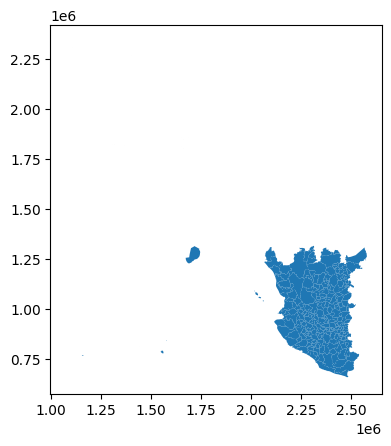

In [60]:
#el segundo spatial overlay que se eligió fue difference (oeste-norte)
mun_oeste.overlay(mun_norte, how='difference').plot()